Epoch 1/20


E:\anaconda\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.3408 - loss: 1.5346 - val_accuracy: 0.3030 - val_loss: 1.1941
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3813 - loss: 1.2379 - val_accuracy: 0.3030 - val_loss: 1.1345
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3728 - loss: 1.1790 - val_accuracy: 0.4444 - val_loss: 1.0977
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3962 - loss: 1.1868 - val_accuracy: 0.2828 - val_loss: 1.1434
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3385 - loss: 1.1748 - val_accuracy: 0.4747 - val_loss: 1.0789
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4432 - loss: 1.0681 - val_accuracy: 0.3737 - val_loss: 1.0703
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5561 - loss: 0.9973 - val_accuracy: 0.5152 - val_loss: 0.9836
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7191 - loss: 0.7688 - val_accuracy: 0.6465 - val_loss: 0.

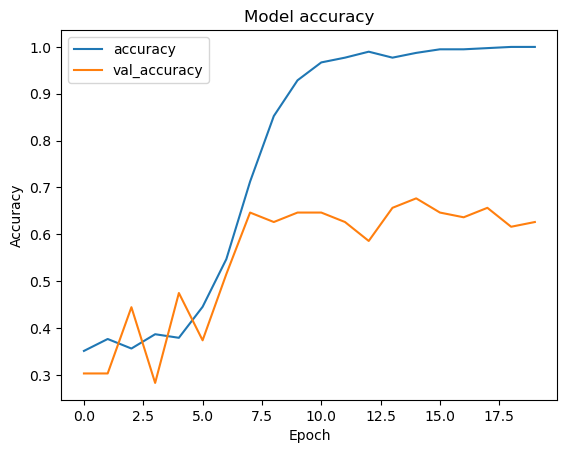

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5984 - loss: 2.6003 
Accuracy on test set: 62.63%
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step


                                                  Text  True_Label  \
78   took the graduate field exam for computer scie...           0   
55   highly recommend httptinyurlcomhowdavidbeatsgo...           4   
272  stanford charity fashion show a top draw httpc...           4   
286  went to see the star trek movie last night ver...           4   
63   morind45 because the twitter api is slow and m...           0   
..                                                 ...         ...   
318  learning about lambda calculus <OOV> <OOV> <OO...           4   
361  night at the museum 2 pretty furkin good <OOV>...           4   
56   blink by malcolm gladwell amazing book and the...           4   
222  atampt is complete fail <OOV> <OOV> <OOV> <OOV...           0   
218  investigation pending on death of stanford cs ...           2   

     Predicted_Label True_Sentiment Predicted_Sentiment  
78                 0         ناراحت              ناراحت  
55                 4    خیلی خوشحال        

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import os
import re  # Import the regex module

# Parameters
file_path = 'C:/Users/user/Downloads/project_asli.xlsx'  # Path to the dataset
max_words = 10000  # Maximum number of words to consider
max_sequence_length = 50  # Maximum sequence length for padding
embedding_dim = 50  # Dimension of the embedding layer
num_classes = 5  # Number of sentiment classes
epochs = 20  # Number of training epochs
batch_size = 32  # Batch size for training

# Load data from Excel
try:
    data = pd.read_excel(file_path)
except FileNotFoundError:
    print(f"Error: The file at {file_path} was not found.")

# Assuming tweet text is in the fourth column (index 3)
X = data.iloc[:, 3]
# Assuming sentiment labels are in the first column (index 0)
y = data.iloc[:, 0]

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    return text

# Apply preprocessing to the text data
X = X.apply(preprocess_text)

# Tokenization and Padding
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X)

X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Build the Model with Dropout layers
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))  # Another dropout layer
model.add(Dense(num_classes, activation='softmax'))  # Softmax activation for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy on test set: {accuracy * 100:.2f}%')

# Predictions on Test Set
predictions = model.predict(X_test)

# Convert predictions to labels
predicted_labels = [int(round(prediction.argmax())) for prediction in predictions]

# Create a DataFrame with text, true labels, and predicted labels
predicted_df = pd.DataFrame({
    'Text': tokenizer.sequences_to_texts(X_test),
    'True_Label': y_test,
    'Predicted_Label': predicted_labels
})

# Map numerical labels to corresponding sentiment labels
label_mapping = {4: 'خیلی خوشحال', 3: 'خوشحال', 2: 'متوسط', 1: 'تقریبا ناراحت', 0: 'ناراحت'}
predicted_df['True_Sentiment'] = predicted_df['True_Label'].map(label_mapping)
predicted_df['Predicted_Sentiment'] = predicted_df['Predicted_Label'].map(label_mapping)

# Display the DataFrame with predicted results
print(predicted_df)

# Save the trained model in the 'twitter' folder
model.save('C:/Users/user/Downloads/twitter/sentiment_analysis_model.h5')

# Load the model for future predictions
# model = load_model('/content/drive/MyDrive/twitter.h5')
